In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
##loading the data.
df = pd.read_csv(r"C:\Users\kandu\Downloads\breast-cancer.csv")

In [24]:
##processing the data.
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['id', 'Unnamed: 32'])##droping the non-predictive columns.
else:
    df = df.drop(columns=['id']) 

In [9]:
##encoding
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [12]:
##spliting the data.
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
##initializing and training all 3 models.
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}
results = {}
print("Training models")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "predictions": y_pred}
    print(f"Training complete for {name}.")

Training models
Training complete for Random Forest.
Training complete for AdaBoost.
Training complete for XGBoost.


In [18]:
##comparing the accuracy of models.
accuracy_df = pd.DataFrame({"Accuracy": [res["accuracy"] for res in results.values()]}, index=results.keys())
accuracy_df_sorted = accuracy_df.sort_values(by="Accuracy", ascending=False)
print(accuracy_df_sorted)
##RandomForest and AdaBoost got too much similar compared to XGBoost.

               Accuracy
Random Forest  0.964912
AdaBoost       0.964912
XGBoost        0.956140


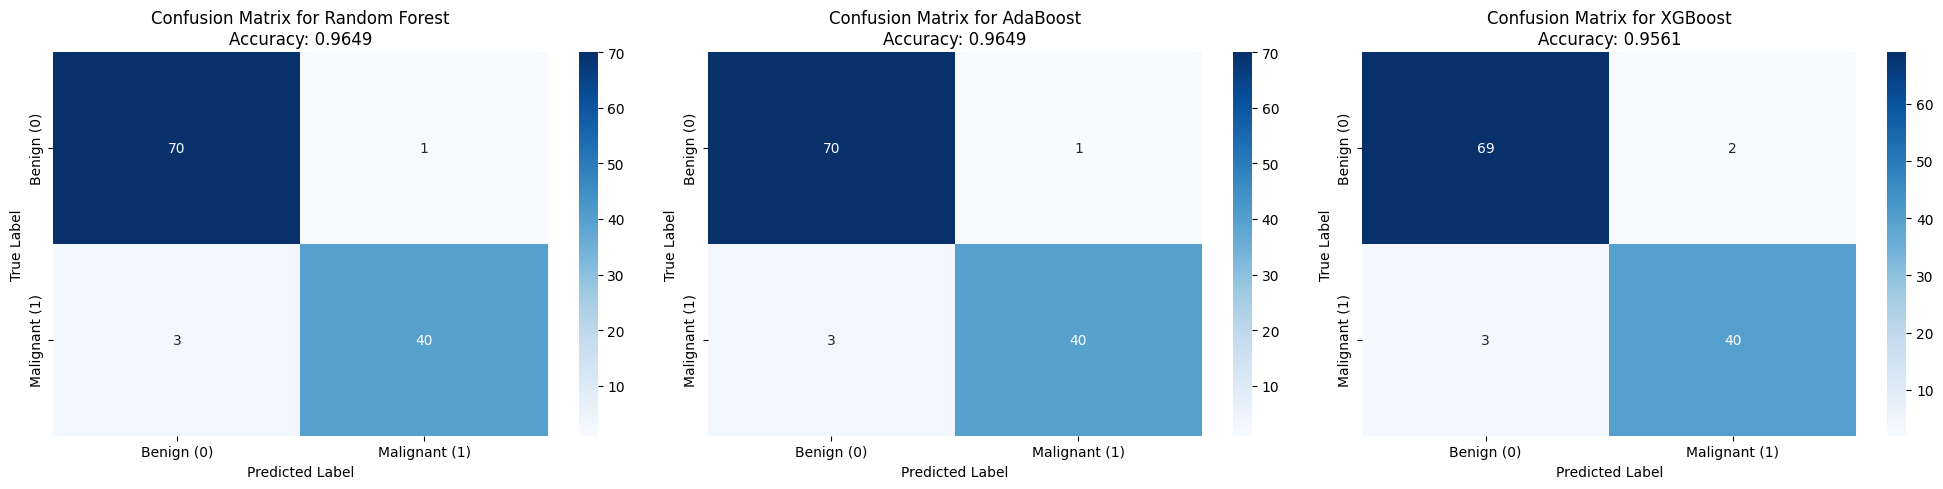

In [20]:
##Error analysis.
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (name, data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, data["predictions"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Benign (0)', 'Malignant (1)'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
    axes[i].set_title(f'Confusion Matrix for {name}\nAccuracy: {data["accuracy"]:.4f}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()
plt.show()
##Here XGBoost makes the lowest errors compared to RandomForest and AdaBoost.
